Buatlah class untuk algoritma Logistic Regression, dengan ketentuan sebagai berikut :
1.  Terdapat method fit yang digunakan untuk proses pembelajaran dengan parameter utama adalah pasangan fitur dan target, jumlah epoch
2. Update Bobot yang digunakan adalah Online Learning
3. Terdapat method predict yang digunakan untuk testing dengan parameter berupa data baru dan return value berupa hasil prediksi binary classification dengan logistic regression
4. Tambahkan method2 tambahan seperti inisialisasi (constructor), perhitungan kinerja dengan menggunakan precision recall, bentuk confusion matrix terlebih dahulu, dan display model yang dihasilkan (jika fitur adalah 1 atau 2 dimensi), dan method2 yang dibutuhkan
5. hanya diperbolehkan menggunakan library bantuan numpy dan matplotlib

Yang harus dikumpulkan :
1. Code berupa link colab
2. Laporan yang berisi :
   - Teori Logistic Regression, termasuk rumus, algoritma, contoh implementasi
   - Contoh perhitungan manual
   - hasil ujicoba dan analisa

Epoch- 0  Data: [3 3]  Output: 0.5  Error: 0.5  w: [-0.005 -0.015 -0.015]
Epoch- 0  Data: [1 2]  Output: 0.4875026035157896  Error: 0.4875026035157896  w: [-0.00987503 -0.01987503 -0.02475005]
Epoch- 0  Data: [3 4]  Output: 0.4579743089029386  Error: 0.4579743089029386  w: [-0.01445477 -0.03361426 -0.04306902]
Epoch- 0  Data: [1 2]  Output: 0.4664985010531951  Error: 0.4664985010531951  w: [-0.01911975 -0.03827924 -0.05239899]
Epoch- 0  Data: [3 3]  Output: 0.4277212600548746  Error: 0.4277212600548746  w: [-0.02339697 -0.05111088 -0.06523063]
Epoch- 0  Data: [8 3]  Output: 0.3479696405155403  Error: -0.6520303594844596  w: [-0.01687666  0.00105155 -0.04566972]
Epoch- 0  Data: [5 2]  Output: 0.47428312525340877  Error: -0.5257168747465912  w: [-0.01161949  0.02733739 -0.03515538]
Epoch- 0  Data: [7 2]  Output: 0.5273306057840257  Error: -0.4726693942159743  w: [-0.0068928   0.06042425 -0.025702  ]
Epoch- 0  Data: [9 0]  Output: 0.6310969136775831  Error: -0.36890308632241686  w: [-0.00

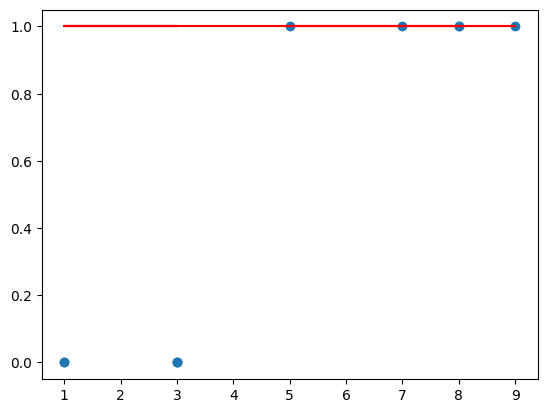

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(self.epochs):
            for i in range(n_samples):
                linear_model = np.dot(X[i], self.weights) + self.bias
                y_predicted = self._sigmoid(linear_model)
                
                error = y_predicted - y[i]
                dw = X[i] * error
                db = error
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                w = np.concatenate((np.array([self.bias]), self.weights))
    
                print('Epoch-', epoch, ' Data:', X[i], ' Output:', y_predicted, ' Error:', error, ' w:', w)
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return np.round(y_predicted)
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _confusion_matrix(self, y_true, y_pred):
        y_pred = self.predict(X)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        return tp, tn, fp, fn
    
    def precision_recall(self, X, y_true):
        y_pred = self.predict(X)
        tp, tn, fp, fn = self._confusion_matrix(y_true, y_pred)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        return precision, recall
    
    def accuracy(self, X, y_true):
        y_pred = self.predict(X)
        tp, tn, fp, fn = self._confusion_matrix(y_true, y_pred)
        return (tp + tn) / (tp + tn + fp + fn)
    
    def display_model(self, X, y):
        if X.shape[1] > 2:
            print("Tidak dapat menampilkan model dengan lebih dari 2 fitur")
            return

        x_values = X[:, 0]

        plt.scatter(x_values, y)
        plt.plot(x_values, self.predict(X), color='red')
        plt.show()

X = np.array([[3,3], [1,2], [3,4], [1,2], [3,3], [8,3], [5,2], [7,2], [9,0], [8,4]])
Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
logisticRegressionModel = LogisticRegression(epochs=2, learning_rate=0.01)
logisticRegressionModel.fit(X, Y)
print("Weights:", logisticRegressionModel.weights)
print("Bias:", logisticRegressionModel.bias)
print("Predict:", logisticRegressionModel.predict(X))
print("Accuracy:", logisticRegressionModel.accuracy(X, Y))
print("Confusion Matrix:", logisticRegressionModel._confusion_matrix(Y, X))
print("Precision Recall:", logisticRegressionModel.precision_recall(X, Y))
logisticRegressionModel.display_model(X, Y)


Perhitungan Manual [link text](https://docs.google.com/spreadsheets/d/1OY7A0hPe7VuuLFaXexZsgeZQZCupeGW4eUVyQEtlQN4/edit?usp=sharing
)